<a href="https://colab.research.google.com/github/MuhammadArifRizkiPohan/ComputerVisionScratch/blob/main/Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IN the model scratch the result is overfitting model

* cv = collect data is very difficult
* the solution is data augmentation, there is increasing the data from the existing data
* teaching the model in good way more the result or accuracy is better because supervised learning

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

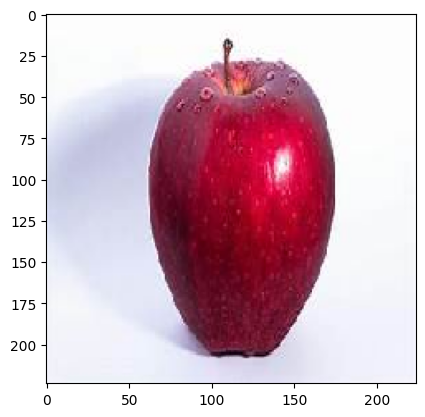

In [2]:
img = image.load_img('/content/OIP.jpeg', target_size=(224,224))

import matplotlib.pyplot as plt

plt.imshow(img)

In [8]:
#DATA AUGMENTATION
#trying setting paramater as you own
datagen = ImageDataGenerator(
    rotation_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
)


In [6]:
# Konversi gambar ke array NumPy dan ubah bentuknya untuk model.
# Baris ini mengkonversi objek gambar (dalam format PIL) menjadi array NumPy.
# Model deep learning memerlukan input dalam bentuk array numerik.
img = image.img_to_array(img)

# Mencetak bentuk (shape) dari array gambar.
# Output (224, 224, 3) berarti gambar memiliki tinggi 224, lebar 224, dan 3 saluran warna (RGB).
print(img.shape)

# Mengubah bentuk array gambar menjadi format batch (1, tinggi, lebar, saluran warna).
# Angka '1' pertama menunjukkan bahwa ini adalah satu gambar dalam satu batch,
# yang diperlukan oleh sebagian besar model deep learning.
input_batch = img.reshape(1, 224, 224, 3)

(224, 224, 3)


In [9]:
#create image
i = 0
for output in datagen.flow(input_batch, batch_size=1, save_to_dir='aug'):
    i = i + 1
    if i == 10:
        break

Menampilkan 10 gambar dari direktori 'aug':


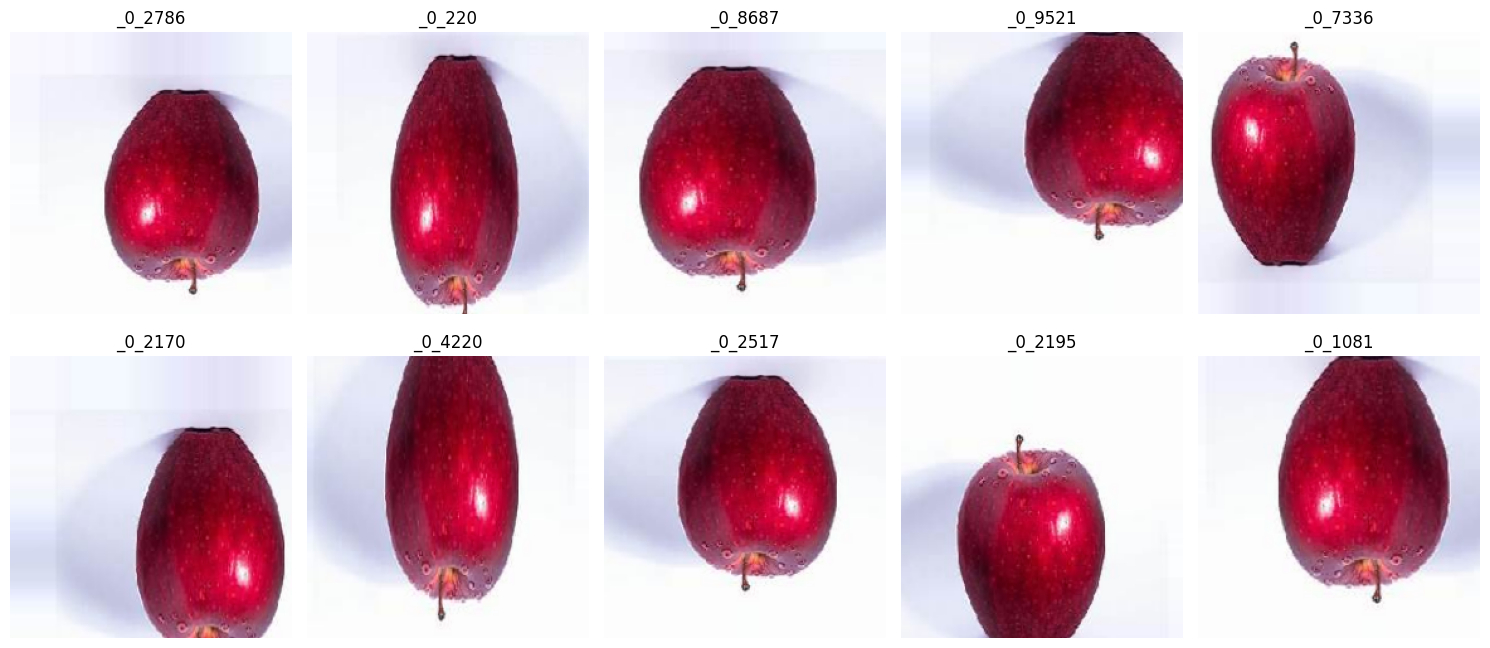

In [10]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Direktori tempat gambar augmented disimpan
aug_dir = 'aug'

# Cek apakah direktori ada
if not os.path.exists(aug_dir):
    print(f"Direktori '{aug_dir}' tidak ditemukan. Silakan jalankan sel yang membuat gambar augmented terlebih dahulu.")
else:
    # Dapatkan daftar semua file gambar di direktori
    image_files = [f for f in os.listdir(aug_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    if not image_files:
        print(f"Tidak ada gambar di direktori '{aug_dir}'. Pastikan sel sebelumnya telah menghasilkan gambar.")
    else:
        print(f"Menampilkan {len(image_files)} gambar dari direktori '{aug_dir}':")
        # Tampilkan setiap gambar
        plt.figure(figsize=(15, 10)) # Ukuran figure untuk tampilan gambar
        for i, img_name in enumerate(image_files):
            img_path = os.path.join(aug_dir, img_name)
            img = Image.open(img_path)

            plt.subplot(len(image_files) // 5 + 1, 5, i + 1) # Atur subplot
            plt.imshow(img)
            plt.title(img_name.split('.')[0]) # Judul dari nama file
            plt.axis('off') # Sembunyikan sumbu
        plt.tight_layout()
        plt.show()